In [1]:
from IPython.display import Image

#### Запускаем flye для ридов  pacbio
./Flye/bin/flye --pacbio-raw ./data/pacbio_10x.fq.gz --out-dir ./out_pacbio_10x --genome-size 4.5m

#### Теперь собираем риды Illumina

python ./SPAdes-3.14.0-Linux/bin/spades.py -o ./out_illumina -1 ./data/illumina.100x.1.fq.gz -2 ./data/illumina.100x.2.fq.gz

#### Гибридная сборка 
python ./SPAdes-3.14.0-Linux/bin/spades.py -o ./out_illumina_pacbio_10x -1 ./data/illumina.100x.1.fq.gz -2 ./data/illumina.100x.2.fq.gz --pacbio ./data/pacbio_10x.fq.gz

#### Quast  для всего
./quast-5.0.2/quast.py -r ./data/reference.fasta ./out_pacbio_10x/assembly.fasta ./out_pacbio_20x/assembly.fasta ./out_pacbio_40x/assembly.fasta ./out_illumina_pacbio_10x/contigs.fasta ./out_illumina_pacbio_20x/contigs.fasta ./out_illumina_pacbio_40x/contigs.fasta ./out_illumina_pacbio_80x/contigs.fasta ./out_illumina/contigs.fasta 

Не получилось только собрать риды pacbio с самым высоким покрытием, логи этой сборки находятся в папке out_pacbio_80x

# Интерпретация


Рассмотрим следующие характеристики:

##### Число контигов
pacbio_10x: 93

pacbio_20x: 24

pacbio_40x: 1

illumina_pacbio_10x: 22

illumina_pacbio_20x: 8

illumina_pacbio_40x: 6

illumina_pacbio_80x: 6

illumina: 167

Можно заметить тенденцию: с увеличением покрытия уменьшается число контигов.

##### Разные метрики

По всем метрикам лучше всего выглядит гибридная сборка и сборка pacbio с высоким покрытием. Но у такой сборки pacbio всего один контиг, поэтому неудивительно, что все метрики содержат самые высокие значения, поэтмоу гибридную сборку будем считать лучшей.

Рейтинг сборок по данному критерию: hybrid, pacbio(40х), illumina

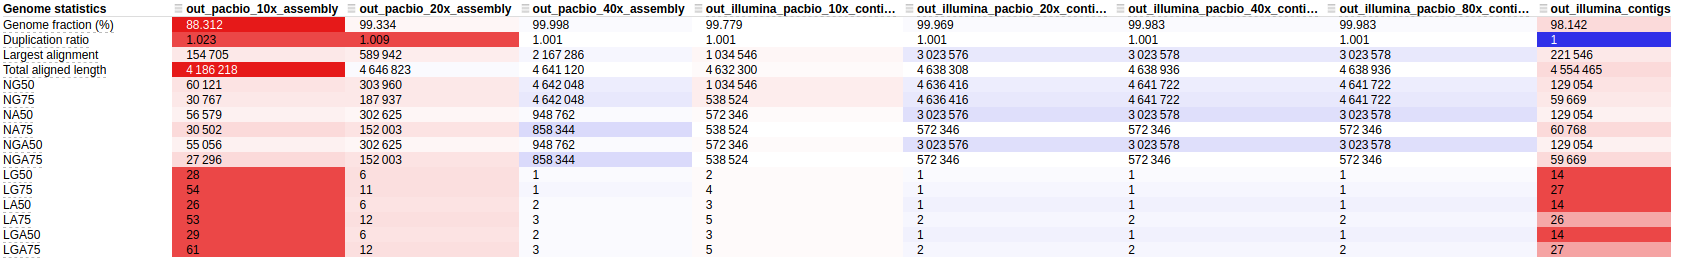

In [7]:
Image('./some.png')

##### Misassemblies
С увеличением покрытия уменьшается число misassembly-позиций для сборки pacbio. Лучше всего выглядит сборка illumina.

Рейтинг сборок по данному критерию: illumina, hybrid, pacbio 


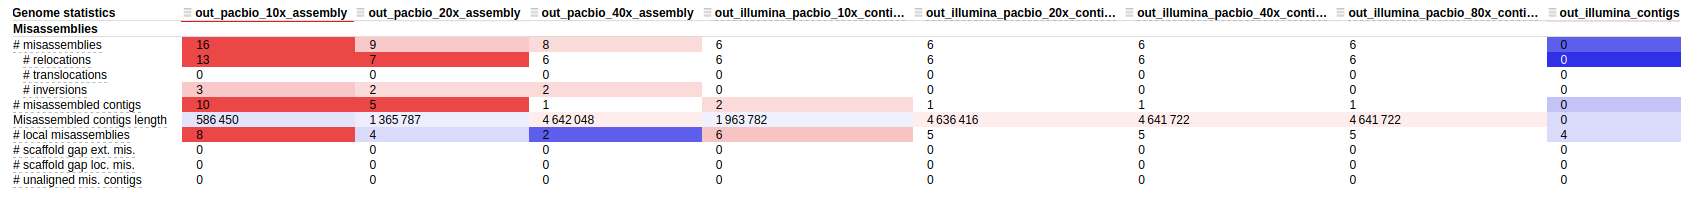

In [3]:
Image('./misassembl.png')

###### Unaligned

Гибридная сборка и сборка коротких ридов по данному критерию идентичны: 1 невыровненный контиг одной длины.

У сборки pacbio с покрытием 40х лучший результат и тут можно подумать так:
1. возможно, все хорошо, так как у этой сборки всего один контиг, и он приложился, можно радоваться.
2. возможно, это ни о чем не говорит, так как у этой сборки и так всего один контиг, и он приложился, сильно радоваться нельзя.

Рейтинг сборок по данному критерию: pacbio(40x), hybrid, illumina (или pacbio(40x), illumina, hybrid)


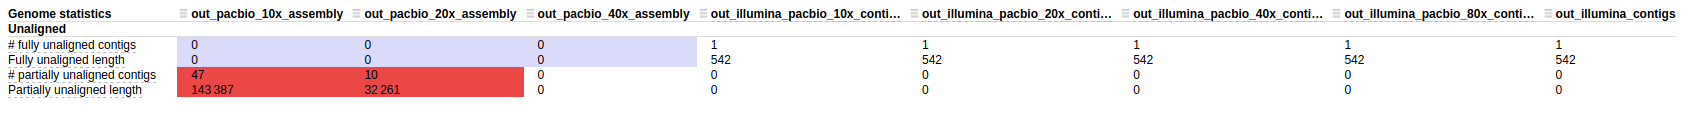

In [4]:
Image('./unaligned.png')

##### Mismatches

Для коротких ридов снова получлись лучшие показатели по сравнению с остальными, но гибридная сборка тоже неплоха. С pacbio все плохо, хотя для высокого покрытия есть неплохие статистики, все портят показатели для инделов.

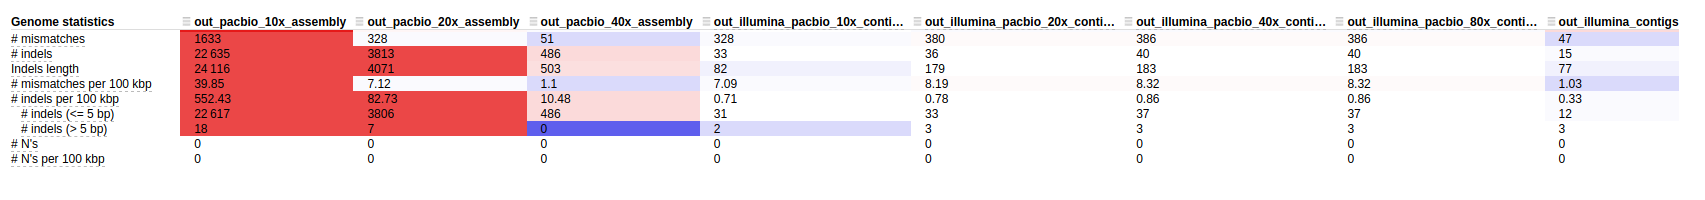

In [6]:
Image('./mismatches.png')

##### Other

Снова лучше всего получилось у гибридной сборки и у сборки pacbio с высоким покрытием. Как и выше будем считать гибридную сборку лучше.

Рейтинг: hybrid, pacbio(40x), illumina

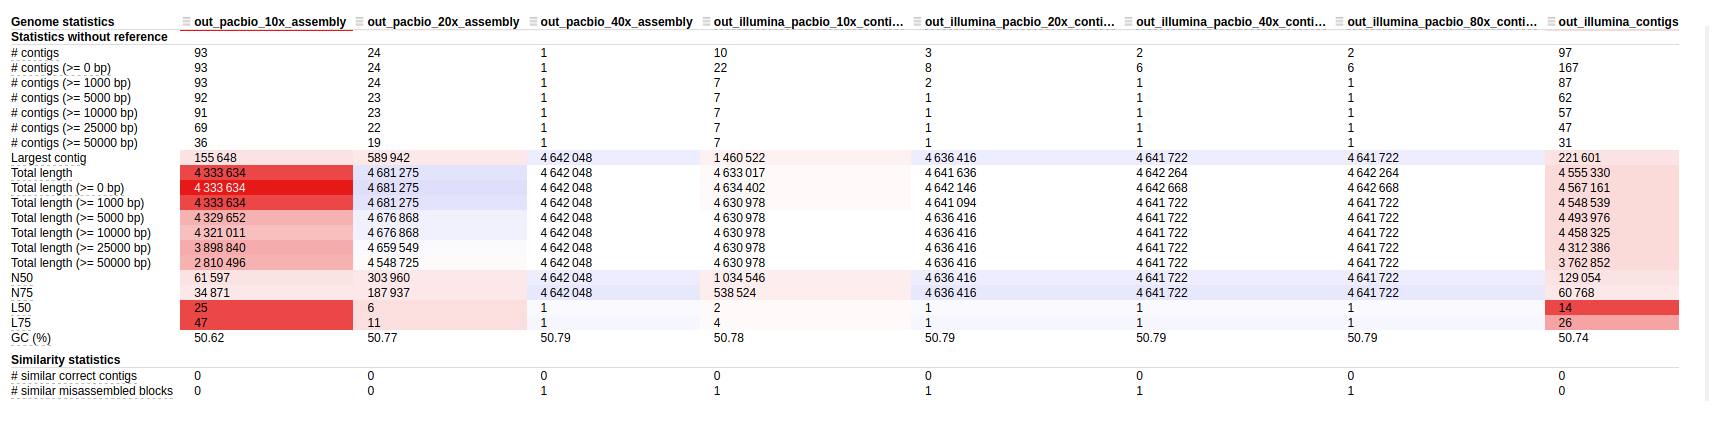

In [8]:
Image('./wref.png')

# Заключение

Судя по всему отчету quast только у гибридной сборки были либо хорошие показатели либо средние, что делает ее лучшей сборкой среди представленных. Особенно логично это выглядит, если учесть, что сборка pacbio с высоким покрытием тоже неплоха, и, возможно, добавление коротких ридов улучшает ситуацию с инделами и кол-вом контигов (ну или это особенности ассемблеров flye и spades).
